# Grid Cell Phase Coding 

The second cell will load the trial data. There are some parameters that can be changed - which **dataset** (1-8) and analysis **type** (spatial/temporal). 

Once the "trial" is initialized, "phase_analysis()" can be run on it to return the correlation value. There are then a number of graph functions that can be run: XY_plot(), phase_plot(), phase_map_plot(), trajectory_plot(), prediction_plot() and corr_plot(). 

Once the parameters in the second cell are set, the whole notebook can be ran via "Cell" -> "Run All"

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
#Some display options
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import bulk_analysis
import pycircstat
import os
import glob
import numpy as np
import astropy

dir = 'JHdata/'

In [22]:
t_angles = []
rls = []
rcs = []

for trial in sorted(os.listdir(dir)):
    for channel in range(1,5):
        
        all = np.loadtxt('JHdata/'+trial+'/CH'+str(channel)+'_Clu0_spikeData.csv', delimiter='\t')        
        if all.shape[0]>900:
            print(trial, channel)
            run = bulk_analysis.gridCells(all, 'temporal', control=False)
            run.phase_analysis()
            t_angles.append(run.angles)
            rls.append(run.rl)
            rcs.append(run.rc)
    

Joshua_Harris_Mar12_EC_DATA_TASK1 1
Joshua_Harris_Mar12_EC_DATA_TASK1 2
Joshua_Harris_Mar12_EC_DATA_TASK1 3
Joshua_Harris_Mar12_EC_DATA_TASK1 4
Joshua_Harris_Mar12_EC_DATA_TASK2 1
Joshua_Harris_Mar12_EC_DATA_TASK2 2
Joshua_Harris_Mar12_EC_DATA_TASK2 3
Joshua_Harris_Mar12_EC_DATA_TASK2 4
Joshua_Harris_Mar15_EC_DATA_TASK1 1
Joshua_Harris_Mar15_EC_DATA_TASK1 2
Joshua_Harris_Mar15_EC_DATA_TASK1 3
Joshua_Harris_Mar15_EC_DATA_TASK1 4
Joshua_Harris_Mar15_EC_DATA_TASK2 1
Joshua_Harris_Mar15_EC_DATA_TASK2 2
Joshua_Harris_Mar15_EC_DATA_TASK2 3
Joshua_Harris_Mar15_EC_DATA_TASK2 4
Joshua_Harris_Mar15_EC_DATA_TASK3 1
Joshua_Harris_Mar15_EC_DATA_TASK3 2
Joshua_Harris_Mar15_EC_DATA_TASK3 3
Joshua_Harris_Mar15_EC_DATA_TASK3 4
Joshua_Harris_Mar15_EC_DATA_TASK4 1
Joshua_Harris_Mar15_EC_DATA_TASK4 2
Joshua_Harris_Mar15_EC_DATA_TASK4 3
Joshua_Harris_Mar15_EC_DATA_TASK4 4
Joshua_Harris_Mar19_EC_DATA_TASK1 1
Joshua_Harris_Mar19_EC_DATA_TASK1 2
Joshua_Harris_Mar19_EC_DATA_TASK1 3
Joshua_Harris_Mar19_EC_DATA_

In [23]:
f_angles = []
frls = []
frcs = []

for trial in sorted(os.listdir(dir)):
    for channel in range(1,5):
        
        all = np.loadtxt('JHdata/'+trial+'/CH'+str(channel)+'_Clu0_spikeData.csv', delimiter='\t')
        
        print(trial, channel)
        if all.shape[0]>900:
            run = bulk_analysis.gridCells(all, 'temporal', control=True)
            run.phase_analysis()
            f_angles.append(run.angles)
            frls.append(run.rl)
            frcs.append(run.rc)

Joshua_Harris_Mar12_EC_DATA_TASK1 1
Joshua_Harris_Mar12_EC_DATA_TASK1 2
Joshua_Harris_Mar12_EC_DATA_TASK1 3
Joshua_Harris_Mar12_EC_DATA_TASK1 4
Joshua_Harris_Mar12_EC_DATA_TASK2 1
Joshua_Harris_Mar12_EC_DATA_TASK2 2
Joshua_Harris_Mar12_EC_DATA_TASK2 3
Joshua_Harris_Mar12_EC_DATA_TASK2 4
Joshua_Harris_Mar13_EC_DATA_TASK1 1
Joshua_Harris_Mar13_EC_DATA_TASK1 2
Joshua_Harris_Mar13_EC_DATA_TASK1 3
Joshua_Harris_Mar13_EC_DATA_TASK1 4
Joshua_Harris_Mar13_EC_DATA_TASK2 1
Joshua_Harris_Mar13_EC_DATA_TASK2 2
Joshua_Harris_Mar13_EC_DATA_TASK2 3
Joshua_Harris_Mar13_EC_DATA_TASK2 4
Joshua_Harris_Mar13_EC_DATA_TASK3 1
Joshua_Harris_Mar13_EC_DATA_TASK3 2
Joshua_Harris_Mar13_EC_DATA_TASK3 3
Joshua_Harris_Mar13_EC_DATA_TASK3 4
Joshua_Harris_Mar13_EC_DATA_TASK4 1
Joshua_Harris_Mar13_EC_DATA_TASK4 2
Joshua_Harris_Mar13_EC_DATA_TASK4 3
Joshua_Harris_Mar13_EC_DATA_TASK4 4
Joshua_Harris_Mar15_EC_DATA_TASK1 1
Joshua_Harris_Mar15_EC_DATA_TASK1 2
Joshua_Harris_Mar15_EC_DATA_TASK1 3
Joshua_Harris_Mar15_EC_DATA_

In [24]:
tangles = np.asarray([item for sublist in t_angles for item in sublist])
fangles = np.asarray([item for sublist in f_angles for item in sublist])


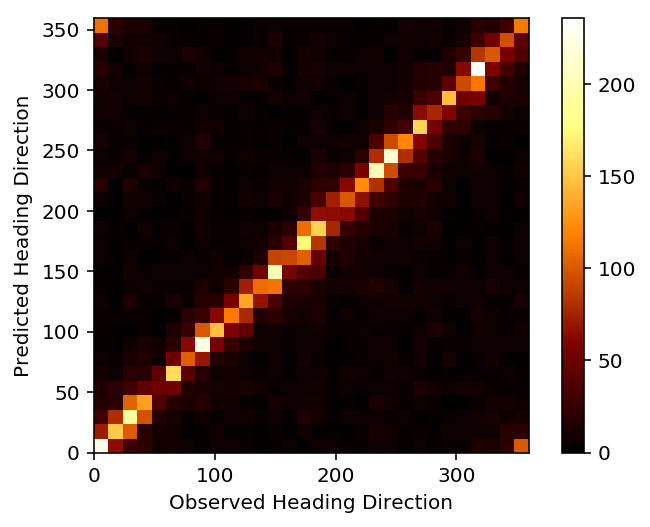

In [25]:
heatmap, xedges, yedges = np.histogram2d(tangles[:, 0], tangles[:, 1], bins=30)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower', cmap='afmhot')
plt.colorbar()
plt.ylabel('Predicted Heading Direction')
plt.xlabel('Observed Heading Direction')
plt.show()

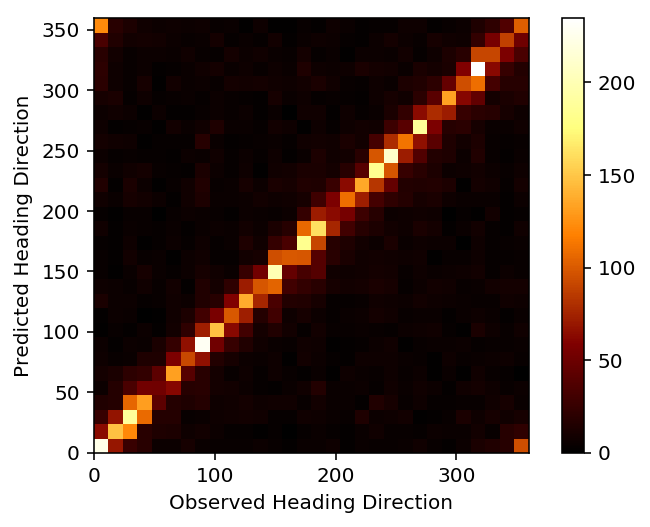

In [26]:
heatmap2, xedges, yedges = np.histogram2d(fangles[:, 0], fangles[:, 1], bins=30)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap2.T, extent=extent, origin='lower', cmap='afmhot')
plt.colorbar()
plt.ylabel('Predicted Heading Direction')
plt.xlabel('Observed Heading Direction')
plt.show()

In [27]:
tdiff = np.radians(tangles[:,0]-tangles[:,1])
fdiff = np.radians(fangles[:,0]-fangles[:,1])

k2 = str(astropy.stats.kuiper_two(tdiff,fdiff)[1])
print('Kuiper Two Test Statistic: '+k2)

Kuiper Two Test Statistic: 0.5326681825586338


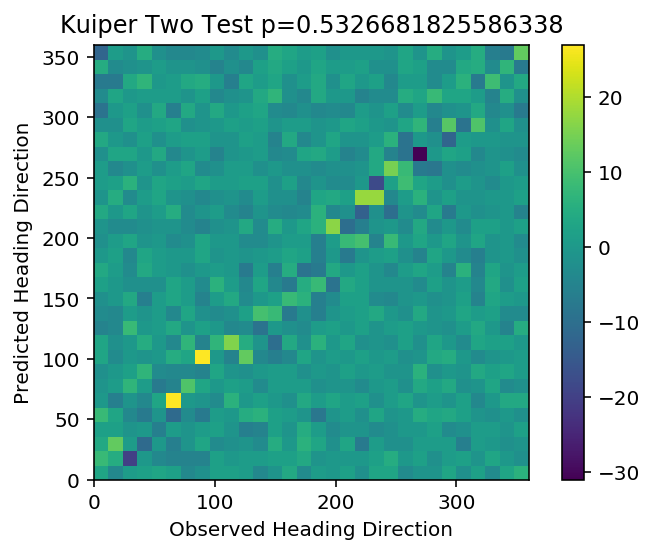

In [36]:
heatmap3, xedges, yedges = np.histogram2d(fangles[:, 0], fangles[:, 1], bins=30)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
diff = heatmap - heatmap2

plt.clf()
plt.imshow(diff.T, extent=extent, origin='lower', cmap='viridis')
plt.colorbar()
plt.ylabel('Predicted Heading Direction')
plt.xlabel('Observed Heading Direction')
plt.title('Kuiper Two Test p='+k2)
plt.show()

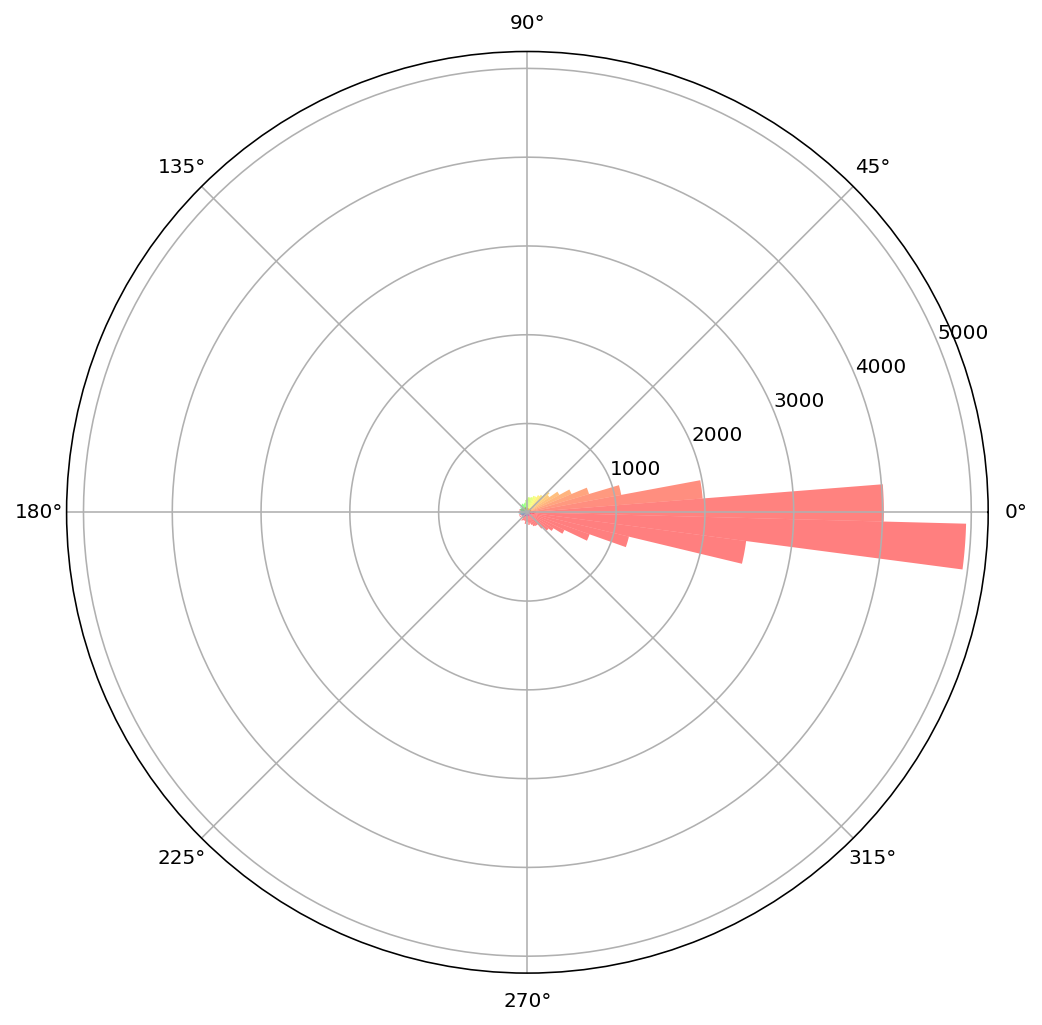

In [11]:
diff = np.sort(tangles[:,0]-tangles[:,1])

fig = plt.figure(figsize=(8,8))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], polar=True)
theta = np.radians(np.arange(diff.min(),diff.max()+6,6))

inds = [np.where(diff<i)[0][-1] for i in np.arange(diff.min()+6,diff.max()+6,6)] #vectorize operation?
b = np.split(diff,inds)
radii = np.array([i.size for i in b])

width = np.radians(360/60)
bars = ax.bar(theta, radii, width=width, bottom=0.0)
for theta, bar in zip(theta, bars):
    bar.set_facecolor(plt.cm.hsv(theta/6.28))
    bar.set_alpha(0.5)

plt.show()

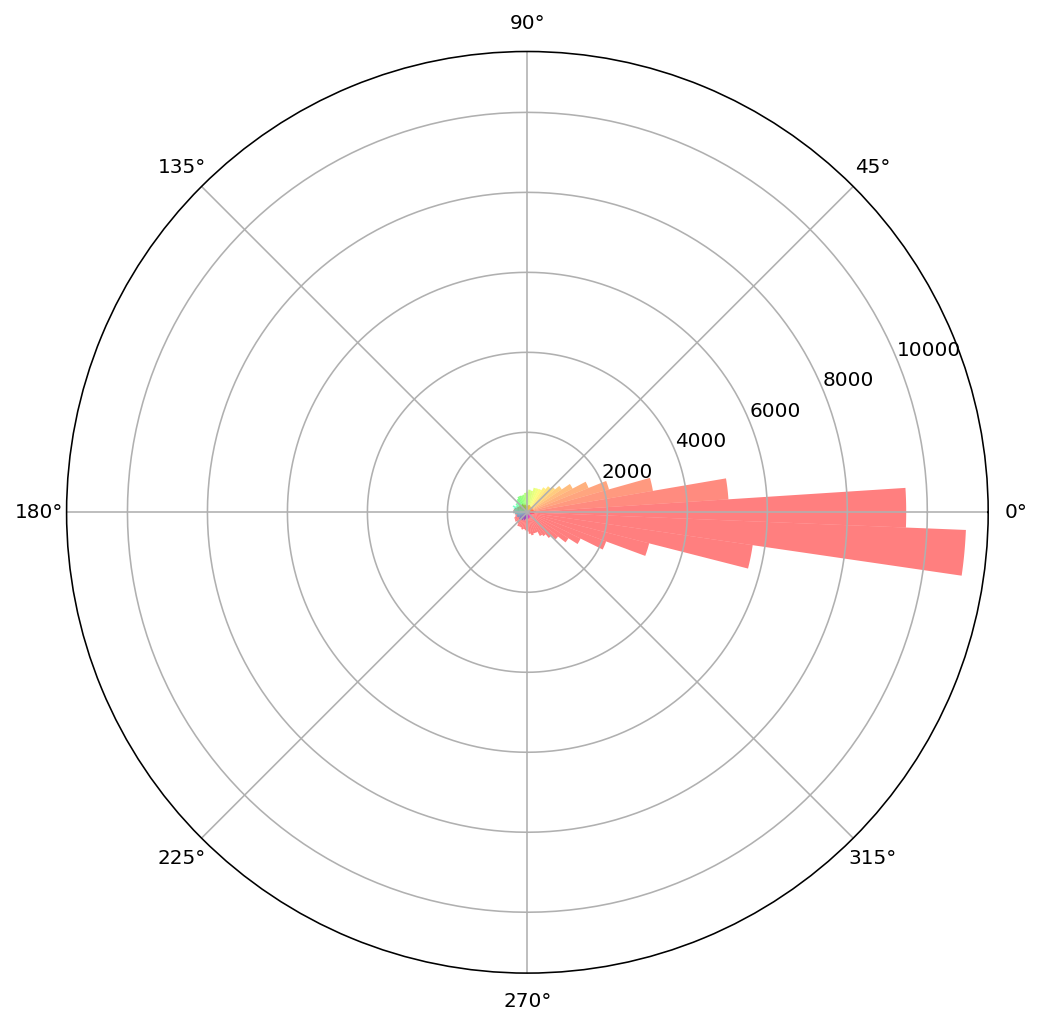

In [25]:
diff = np.sort(fangles[:,0]-fangles[:,1])

fig = plt.figure(figsize=(8,8))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], polar=True)
theta = np.radians(np.arange(diff.min(),diff.max()+6,6))

inds = [np.where(diff<i)[0][-1] for i in np.arange(diff.min()+6,diff.max()+6,6)] #vectorize operation?
b = np.split(diff,inds)
radii = np.array([i.size for i in b])

width = np.radians(360/60)
bars = ax.bar(theta, radii, width=width, bottom=0.0)
for theta, bar in zip(theta, bars):
    bar.set_facecolor(plt.cm.hsv(theta/6.28))
    bar.set_alpha(0.5)

plt.show()